In [14]:
import numpy as np
import matplotlib.pyplot as plt
import dynamo as dyn
import pandas as pd
import os
import seaborn as sns
import anndata as Anndata

In [15]:
# type set
from typing import Dict, List, Any, Tuple
from pandas import DataFrame

In [16]:
dyn.dynamo_logger.main_silence()

In [17]:
# # ----------------------------------------------------------------------------------------------
# ###
# # load data 
adata = dyn.read_h5ad("./data/H44DL1208_pres_processed_data.h5ad")

In [18]:
from jacobian_analysis import Jacobian
basis = 'umap'
jacoInfo = Jacobian(adata)

e:\anaconda\install\envs\py39\lib\site-packages\anndata\_core\anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


In [19]:

### query dictionary, key is cell type, value is the given coords
# query_dict = {
#     'RGCs': adata.uns['VecFld_'+basis]['Xss'][[14,24]],
#     'GABAergic ACs': adata.uns['VecFld_'+basis]['Xss'][[21]],
# }

# use coordinates in cell types
query_dict = {
    'RGCs': np.array([[-12.10928332,   4.55434168],
                      [-10.53804622,   0.38159287],]),
    'GABAergic ACs': np.array([[2.57823002, 4.2471646]]),
}


genes_dict = {
    'RGCs': adata[:,adata.var['use_for_pca']].var_names.tolist()[:100],
    'GABAergic ACs': adata[:,adata.var['use_for_pca']].var_names.tolist()[:100],
}

In [20]:
query_dict

{'RGCs': array([[-12.10928332,   4.55434168],
        [-10.53804622,   0.38159287]]),
 'GABAergic ACs': array([[2.57823002, 4.2471646 ]])}

In [21]:
TF_list: DataFrame = pd.read_csv("TF_Iist_daniorerio.txt", sep=" ",names=['all'])
TF_list = TF_list['all'].tolist()

In [22]:
TF_list[:5]

['tfap2e', 'tfap2b', 'tfap2d', 'tfap2c', 'tfap2a']

---  There is this folder!  ---
For RGCs_0, found 10 neighbors.
For RGCs_1, found 10 neighbors.


e:\anaconda\install\envs\py39\lib\site-packages\anndata\_core\anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


---  There is this folder!  ---
For GABAergic ACs_0, found 10 neighbors.


e:\anaconda\install\envs\py39\lib\site-packages\anndata\_core\anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


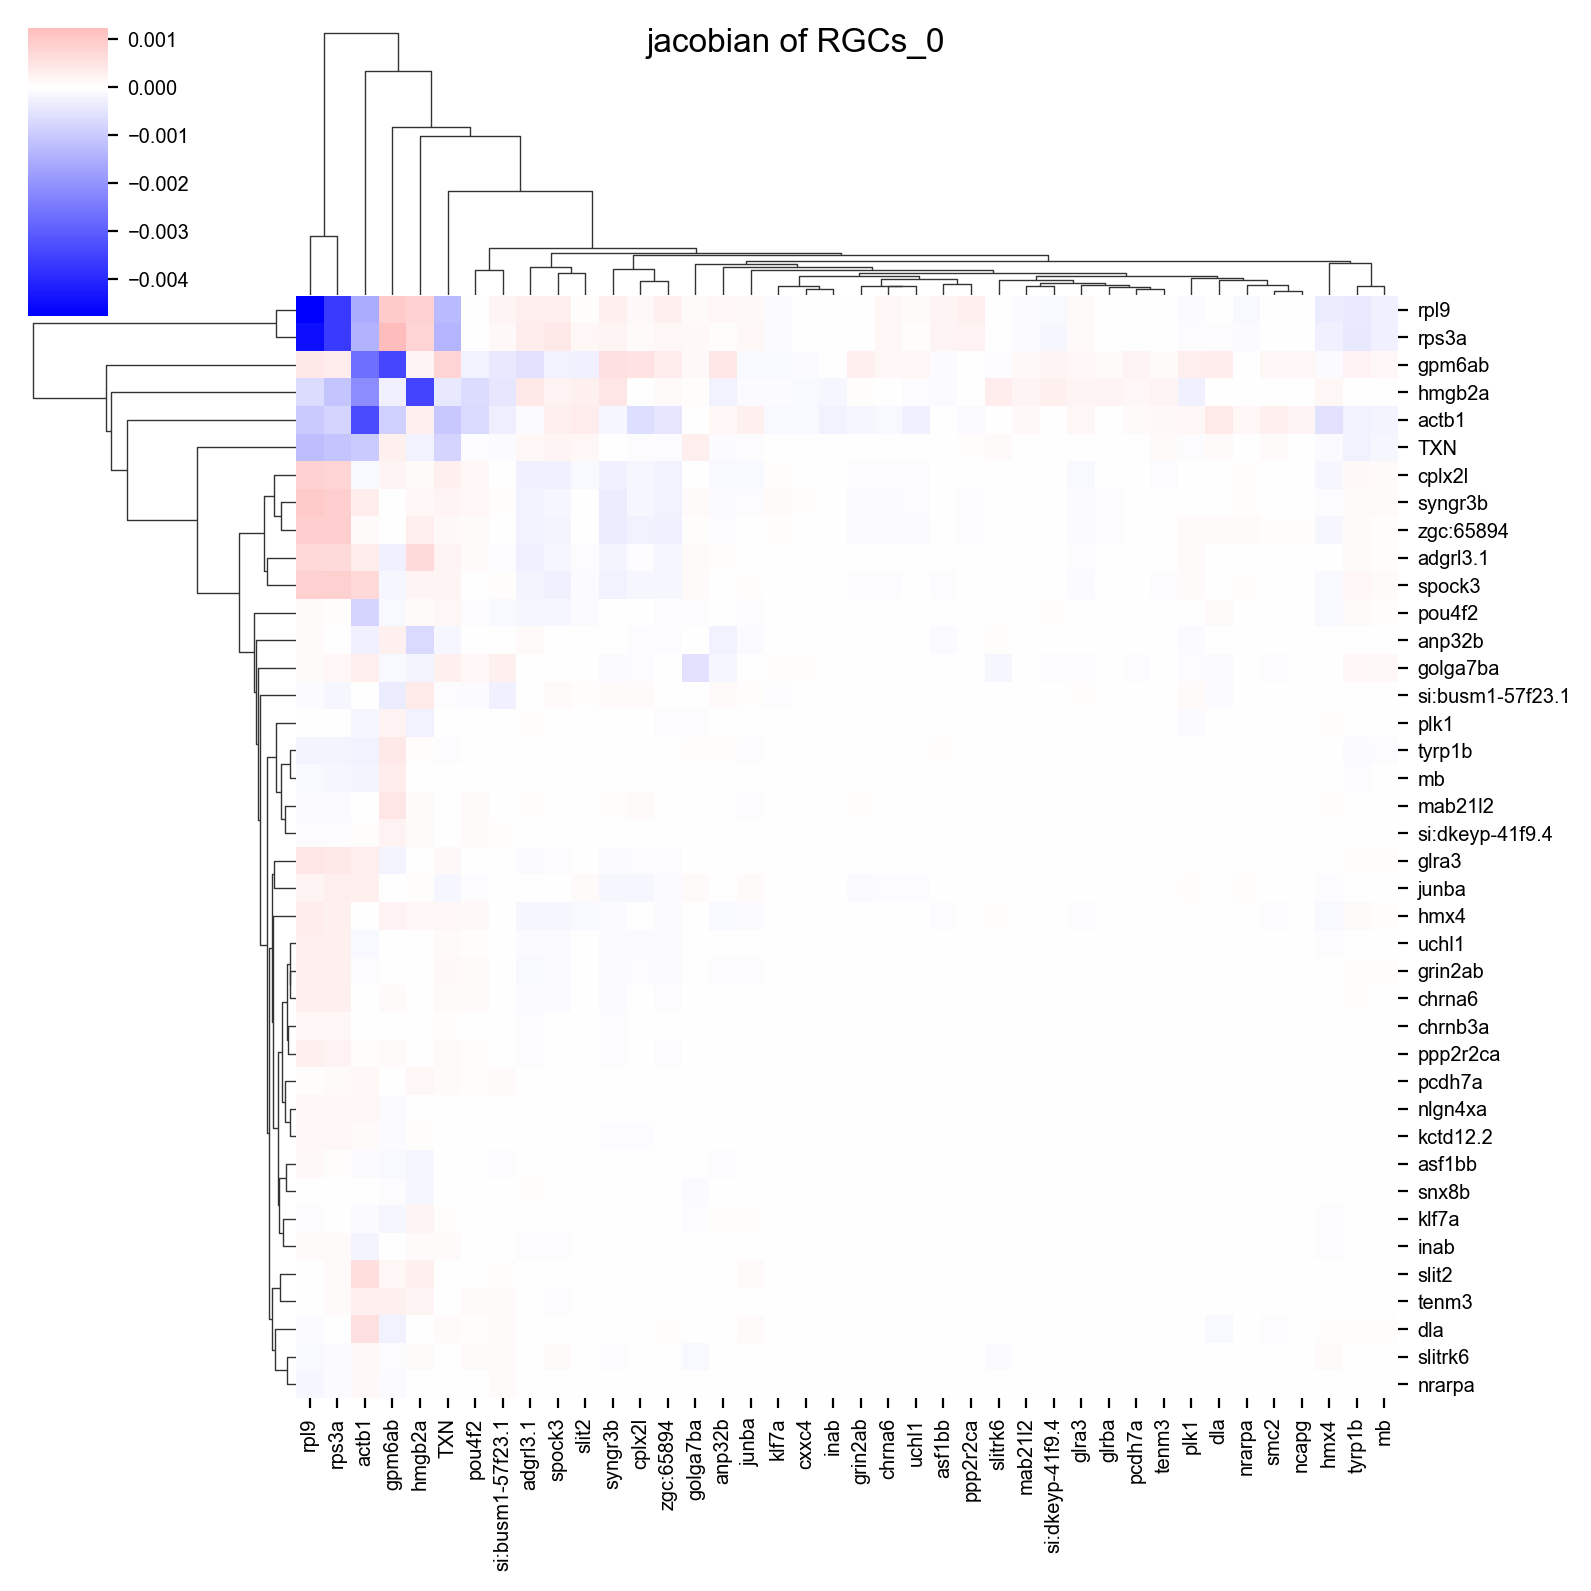

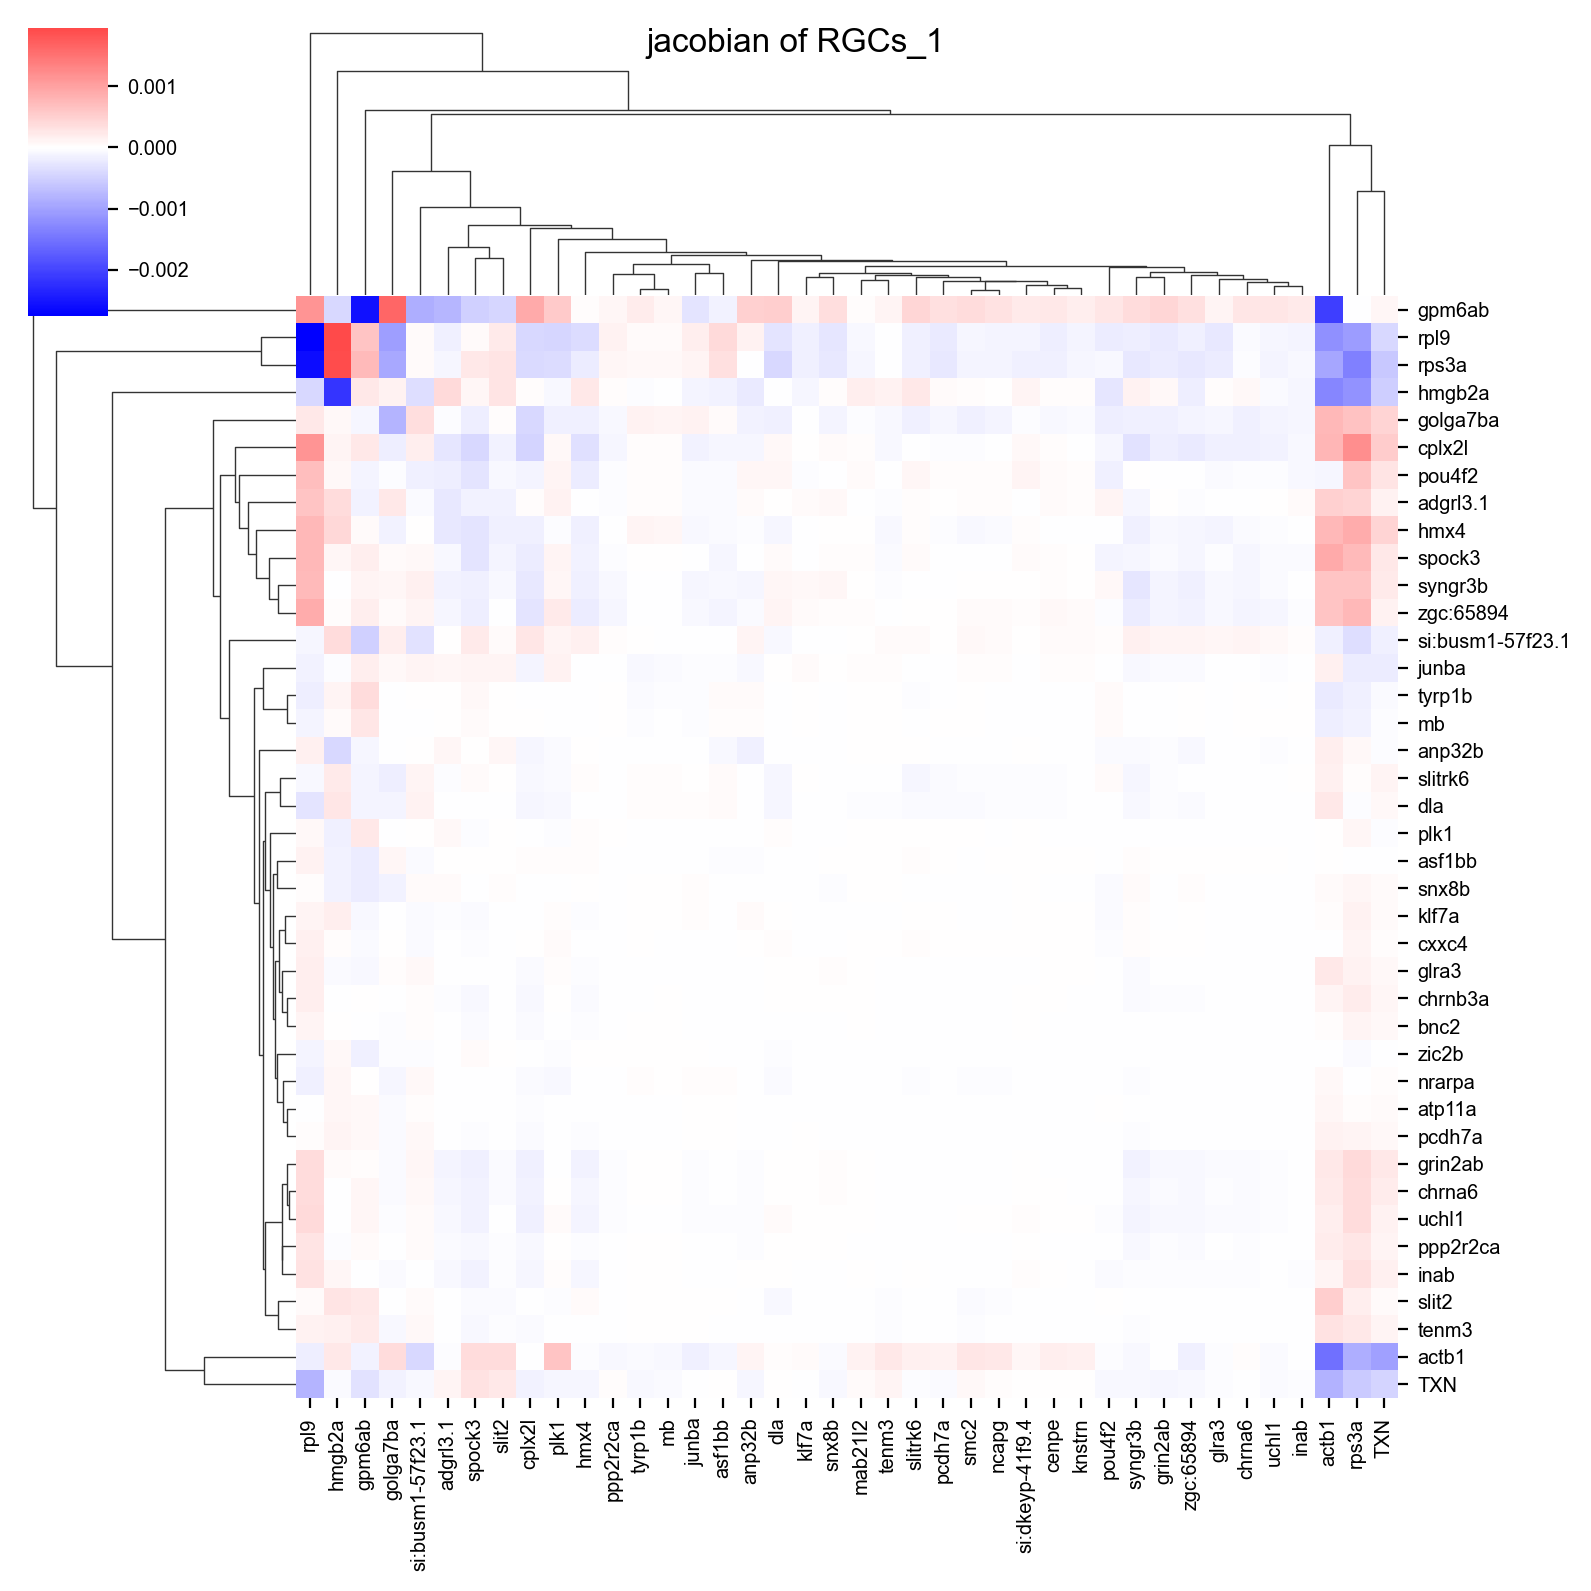

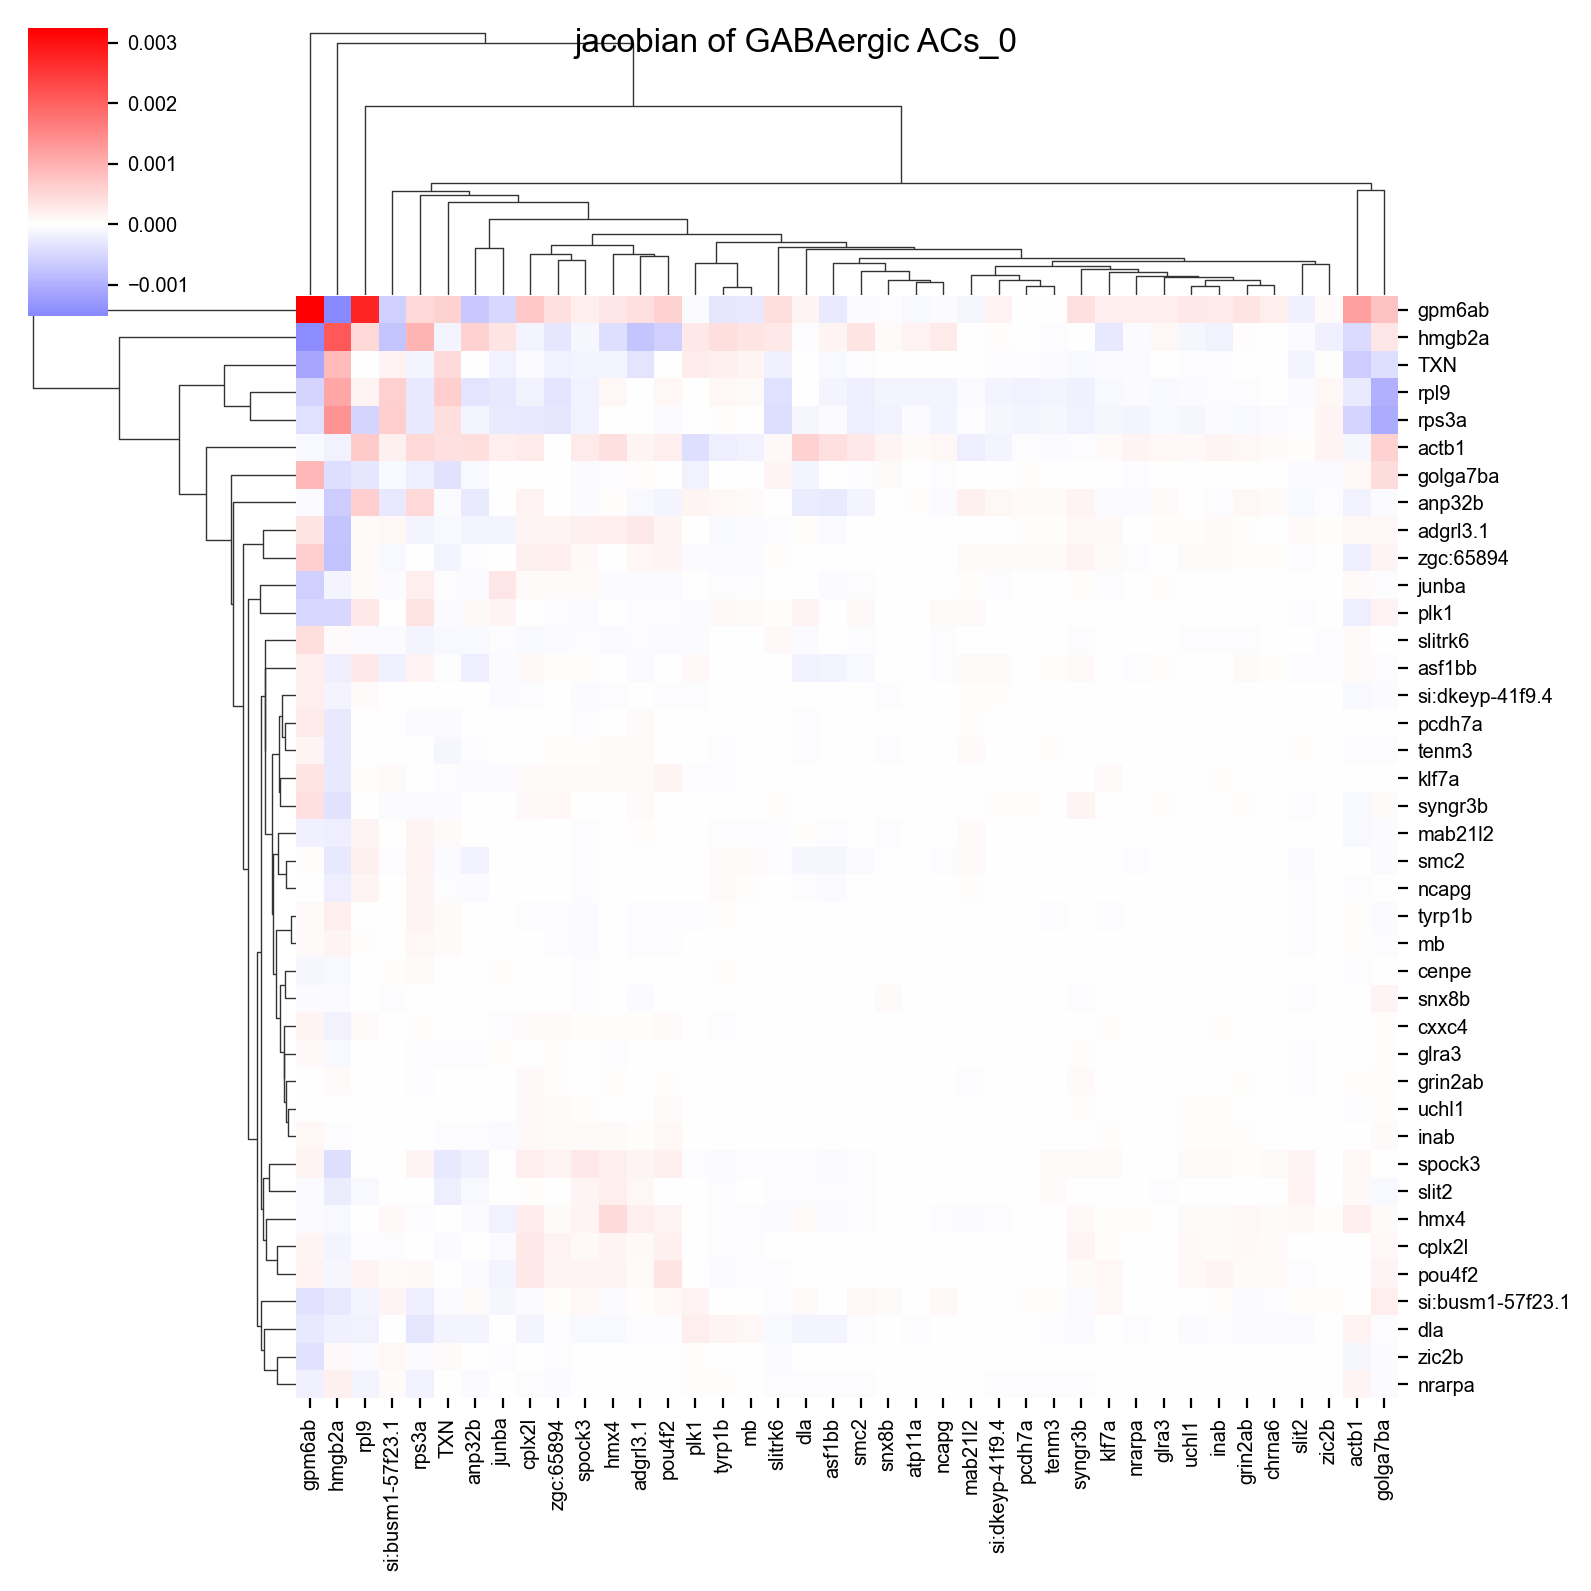

In [23]:


TFs_dict = {
    # 'RGCs':TF_list,
    # 'GABAergic ACs':TF_list,
}
save_path = 'zebrafish_H44atoh7_1/Figures_H44_DL_1208_pres/umap_adata/jacobian_analysis/'
# {row,col}_cluster: `bool`,
# If `True`, cluster the {rows, columns} when plot the heatmap of Jacobian matrix.
# larger rowsQuantile obtaining more columns
# larger colsQuantile obtaining more rows
Jac_dict = jacoInfo.get_JacInfo(query_dict=query_dict,n_neighbors=10,genes_dict=genes_dict,TFs_dict=TFs_dict,row_cluster=True,col_cluster=True,save_res=True,save_fig=True,save_path=save_path,rowsQuantile=0.4,colsQuantile=0.4)